In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
df = pd.read_csv('data.csv') 

In [21]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [23]:
#Data Cleaning
df.drop(["Unnamed: 32",'id'],axis=1,inplace=True) 

In [24]:
# Not GOOD , But not BAD
df.diagnosis.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [25]:
#Handling Text and Categorical Attributes (Ordinal Encoding and a One-Hot Encoding.)
diagnosis={'M':1, 'B':0}
df['diagnosis']=[diagnosis[x] for x in df['diagnosis']]

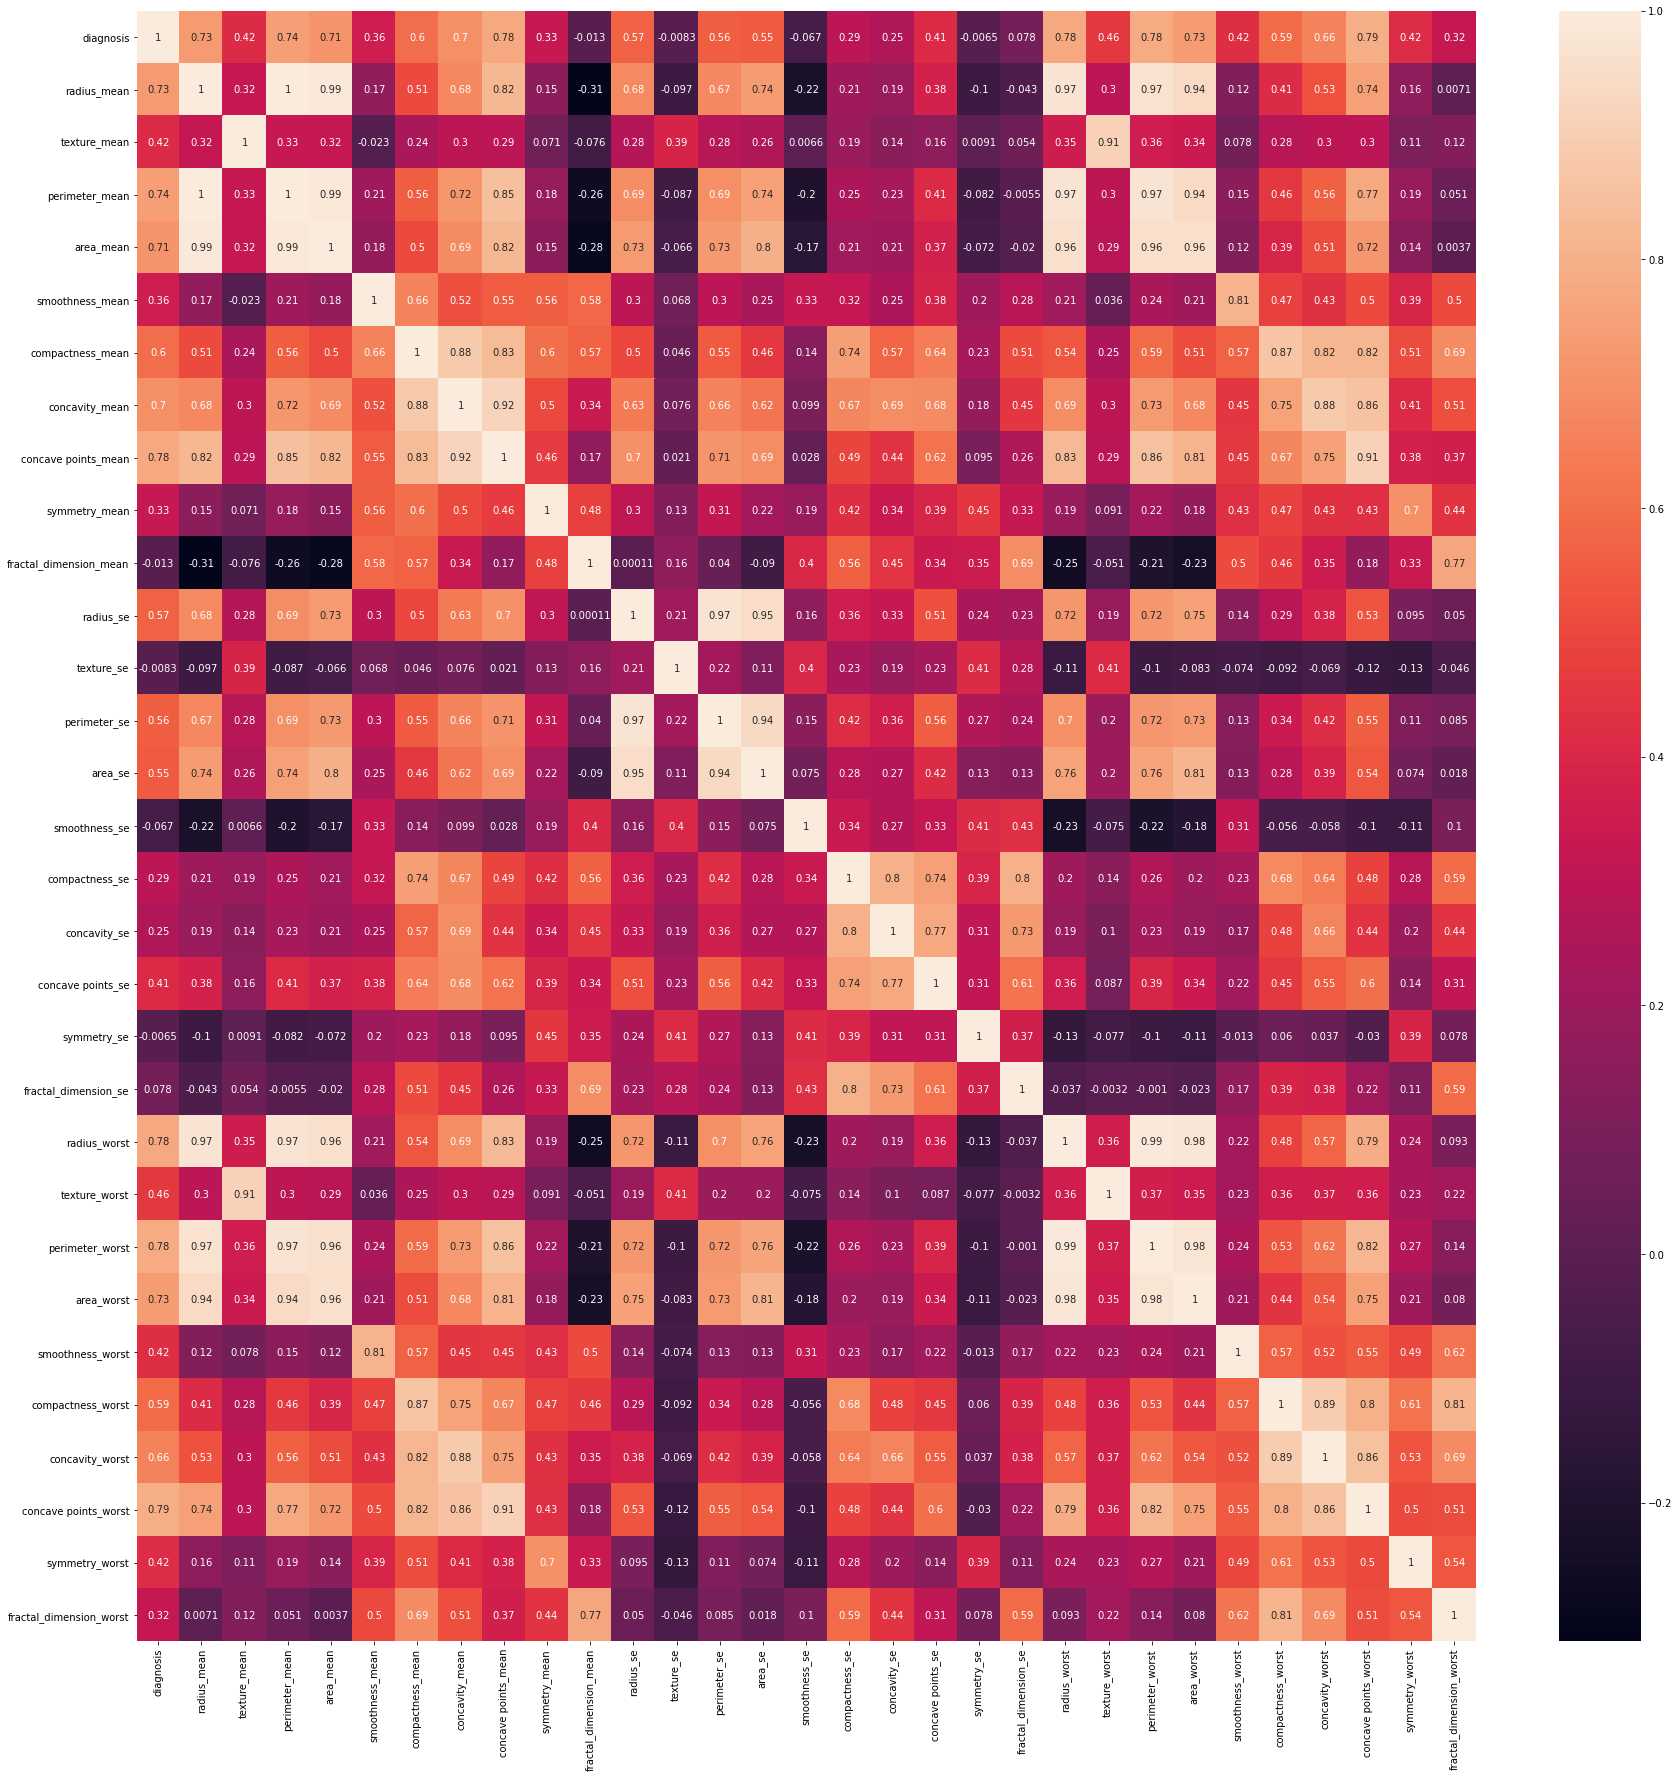

In [26]:
plt.figure(figsize=(30,30))
sns.heatmap(df.corr(), annot=True)
plt.show()

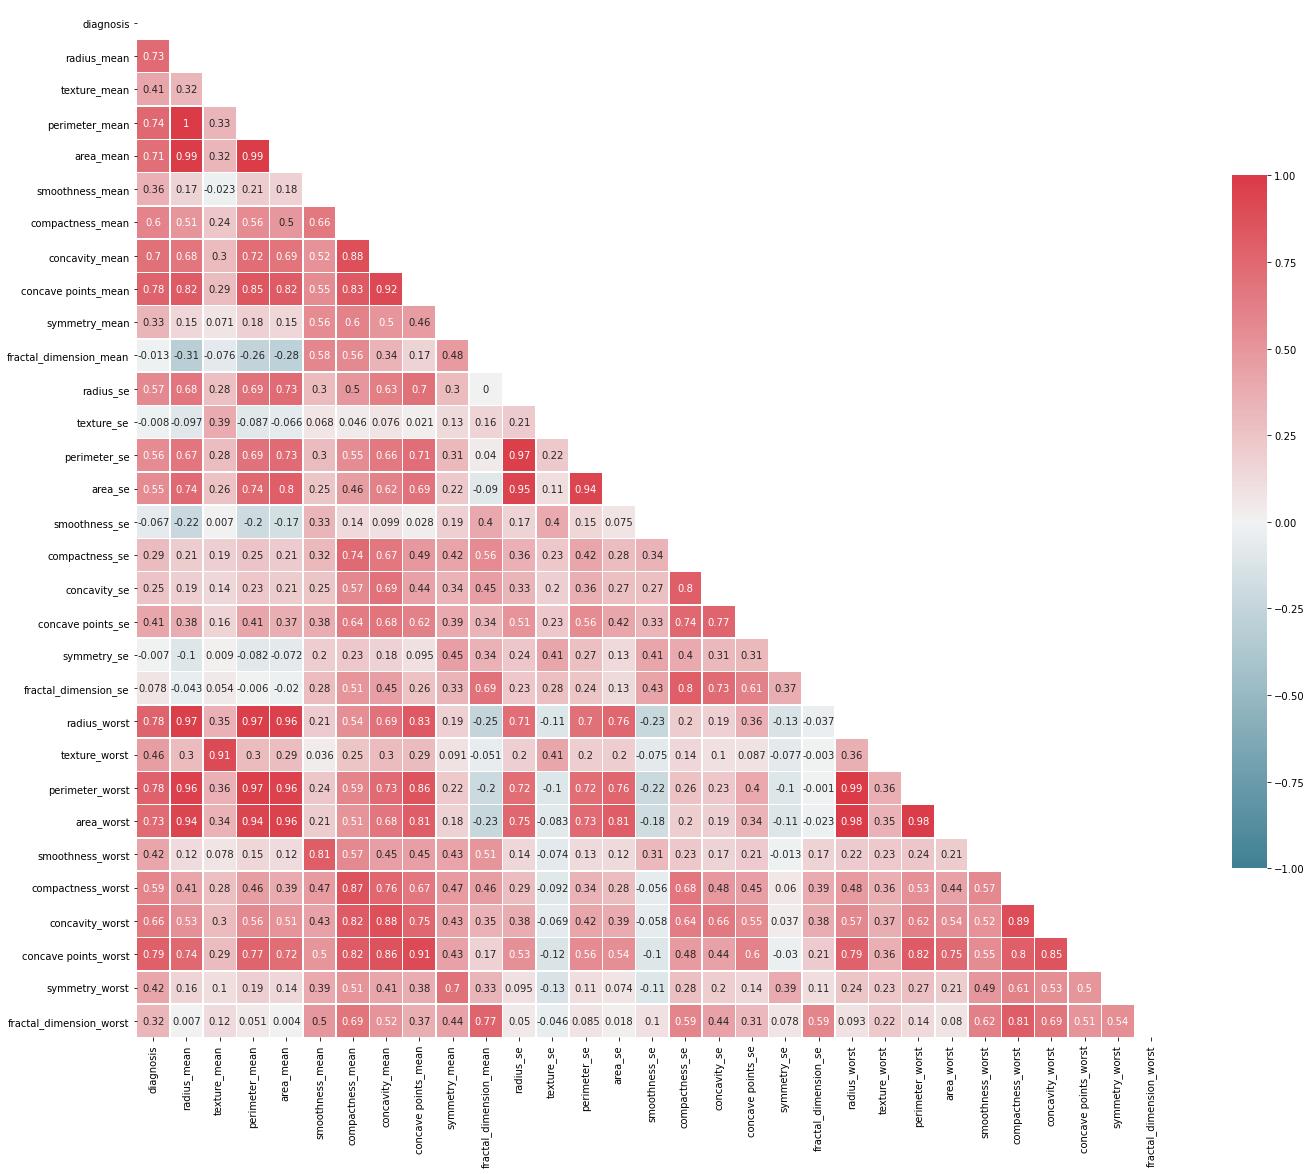

In [27]:
corr = df.corr().round(3)

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(20, 20))

cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0,            
square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)
plt.tight_layout()

In [28]:
pd.DataFrame([df.corr()['diagnosis'].sort_values()])

,smoothness_se,fractal_dimension_mean,texture_se,symmetry_se,fractal_dimension_se,concavity_se,compactness_se,fractal_dimension_worst,symmetry_mean,smoothness_mean,...,concavity_mean,area_mean,radius_mean,area_worst,perimeter_mean,radius_worst,concave points_mean,perimeter_worst,concave points_worst,diagnosis
diagnosis,-0.067016,-0.012838,-0.008303,-0.006522,0.077972,0.25373,0.292999,0.323872,0.330499,0.35856,...,0.69636,0.708984,0.730029,0.733825,0.742636,0.776454,0.776614,0.782914,0.793566,1.0


In [29]:
feature =['texture_mean','compactness_mean','concavity_mean','perimeter_se',
          'concave points_mean','perimeter_worst','concave points_worst','smoothness_mean','concave points_se',
          'texture_worst','compactness_worst','symmetry_worst', 'fractal_dimension_worst'
         ]

In [30]:
target = df['diagnosis']

In [31]:
features = df [feature]

## Model

In [32]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [33]:
X_train , X_test ,y_train , y_test = train_test_split(
                                             features,target 
                                            ,test_size=0.2
                                            ,random_state=42)

In [34]:
tree_clf = DecisionTreeClassifier(max_depth=4.66)
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4.66)

In [35]:
y_pred = tree_clf.predict(X_test)

In [36]:
accuracy_score(y_pred , y_test)

0.956140350877193

In [37]:
from matplotlib import pyplot as plt
from sklearn import tree

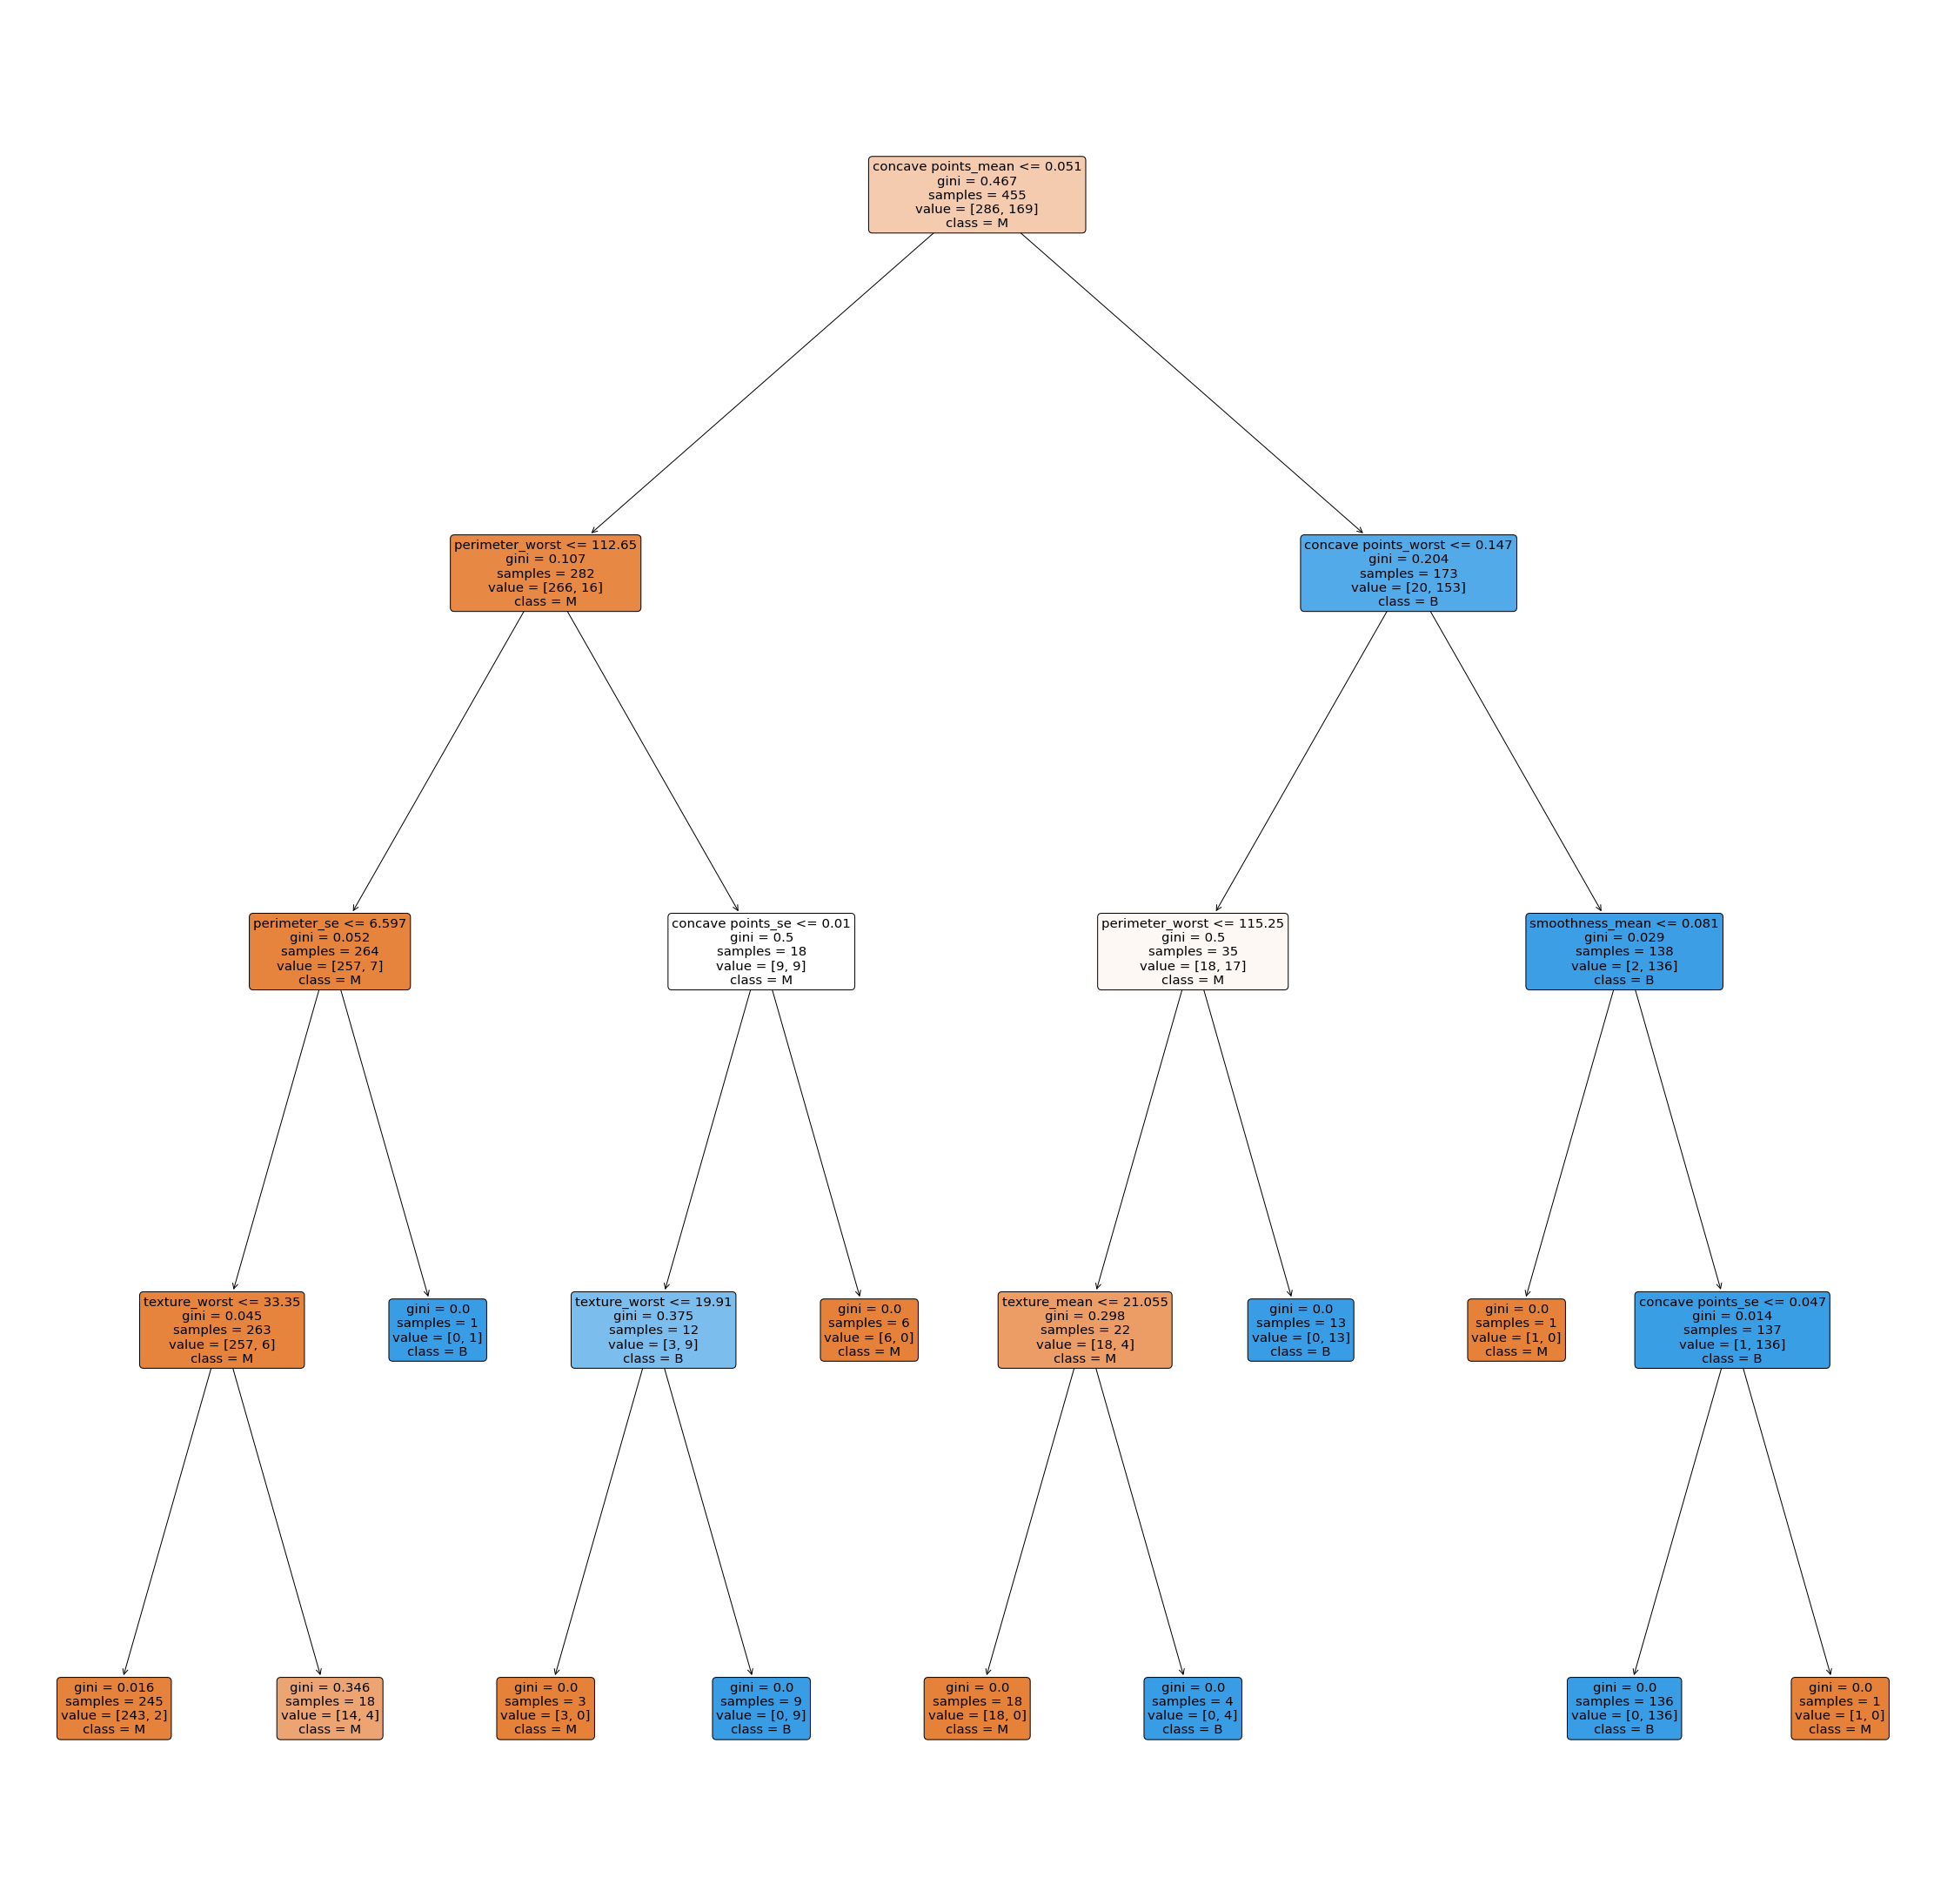

In [38]:
fig = plt.figure(figsize=(40,40))
_=tree.plot_tree(tree_clf, 
                   feature_names=feature,  
                   class_names=['M','B'],
                   rounded=True,
                   filled=True)

In [39]:
from sklearn.ensemble import RandomForestClassifier

In [40]:
rnd_clf = RandomForestClassifier(n_estimators=100,
                                 
                                 max_depth= 7,
                                 random_state=42)

In [41]:
rnd_clf .fit(X_train , y_train)

RandomForestClassifier(max_depth=7, random_state=42)

In [42]:
y_pred_rnd1 = rnd_clf.predict(X_test)

In [43]:
accuracy_score (y_pred_rnd1, y_test)

0.9649122807017544

In [44]:
from sklearn.metrics import classification_report

In [45]:
print (classification_report(y_pred_rnd, y_test,target_names=['B','M'], digits=5))

NameError: name 'y_pred_rnd' is not defined

In [87]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [88]:
rnd_clf = RandomForestClassifier(n_estimators=10,max_depth=10,random_state=42)
svm_clf = SVC(random_state=42)
log_clf = LogisticRegression(solver="lbfgs", random_state=42)

In [89]:
votti_clf = VotingClassifier(
    estimators = [('rf',rnd_clf),('svc',svm_clf),('lr', log_clf)] 
    ,voting = 'hard'
)

In [90]:
votti_clf.fit(X_train , y_train)

C:\Users\laptop\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(max_depth=10,
                                                     n_estimators=10,
                                                     random_state=42)),
                             ('svc', SVC(random_state=42)),
                             ('lr', LogisticRegression(random_state=42))])

In [91]:
y_pred =votti_clf.predict(X_test)

In [92]:
accuracy_score (y_pred, y_test)

0.9649122807017544

In [3]:
!jupyter nbextension enable hinterland/hinterland

Enabling notebook extension hinterland/hinterland...
      - Validating: ok
